# Router

## Routing

**Routing**

네트워크에서 경로를 선택하는 프로세스-웹 애플리케이션에서 다른 페이지 간의 전환과 경로를 관리하는 기술


**SSR에서의 Routing**

- 기존 SSR 방식에서는 클라이언트가 서버로 요청을 하면 페이지 전환때마다 매번 HTML을 보내줌.

**CSR/SPA에서의 Routing**

- SPA에서의 routing은 브라우저의 클라이언트 측에서 수행.

- 클라이언트 측 JavaScript가 새 데이터를 동적으로 가져와 전체 페이지를 다시 로드 x, 페이지는 1개이지만 링크에 따라 여러 컴포넌트를 렌더링해 기술적으로는 문서가 하나지만 사용자는 마치 여러 페이지를 사용하는 것 처럼 보임

**만약 routing이 없다면?**

- 유저가 URL을 통한 페이지의 변화를 감지할 수 없음.

- 페이지가 무엇을 렌더링 중인지 알 수 없음. (URL이 하나이기 때문에 새로고침 시 처음 페이지로 돌아감, 링크 공유시 첫 페이지만 공유가능,)

- 브라우저의 뒤로가기 기능 사용 불가



## Vue Router


**Vue Router** 

Vue 공식 라우터.

https://router.vuejs.org/

vite로 프로젝트 생성 시 router 추가 함

링크에 따라 변경되는 URL과 새로 렌더링되는 화면--> 실제 새로고침이 없으나 새로운 페이지를 보는 것 같음


**RouterLink** 

페이지를 다시 로드하지 않고 URL을 변경하고 URL 생성 및 관련 로직을 처리.

HTML의 a 태그를 렌더링. a 태그의 기본 기능을 어느부분 막음. 그냥 url만 바뀌게 하는 기능만 남아있는듯


**RouterView**

URL에 해당하는 컴포넌트를 표시(Router to="" 에 해당하는.). 어디에나 배치하여 레이아웃에 맞출 수 있음

**router/index.jx**

라우팅에 관련된 정보 및 설정이 작성되는 곳. router에 URL과 컴포넌트를 매핑.

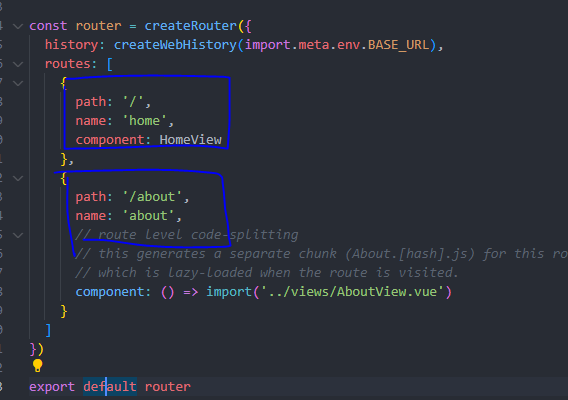

urls.py 같은. 이제 url이라 부르지 않고 route라 부릅니당. 주소가 결정되는 곳!

**views**

RouterView 위치에 렌더링 할 컴포넌트 배치. 기존 components 폴더와 기능적으로 다를 것 없으며 단순 분류의 의미로 구성됨.

일반 컴포넌트와 구분하기 위해 컴포넌트 이름을 View로 끝나도록 작성하는 것을 권장.


### Basic Routing

**라우팅 기본**

1. index.js에 라우터 관련 설정 작성(주소, 이름, 컴포넌트)
   
2. RouterLink의 "to"속성으로 index.js에서 정의한 주소 속성 값(path) 사용

url에 이름을 붙이고 편하게 사용(하나하나 바꿀 것 없이)


### Named Routes

**Named Routes**

경로에 이름을 지정하는 라우팅

name 속성 값에 경로에 대한 이름을 지정. 경로에 연결하려면 RouterLink에 v-bind(:)를 사용해 "to" prop 객체로 전달.

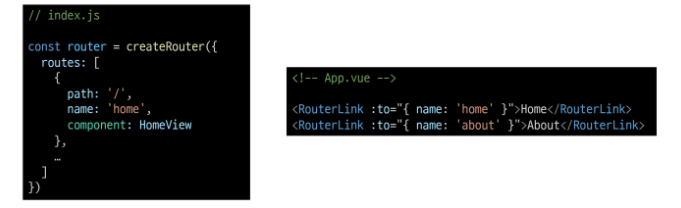

장점:

하드 코딩 된 URL을 사용하지 않아도 됨. URL 입력 시 오타 방지

### Dynamic Route Matching with Params

파라미터를 동적 라우팅으로 어떻게 처리할 것인가?

**매개변수를 사용한 동적 경로 매칭**

주어진 패턴 경로를 동일한 컴포넌트에 매핑해야 하는 경우 활용

-모든 사용자의 ID를 활용해 프로필 페이지 url을 설계한다면--? 모든 ID에 대해 URL을 설정해주긴 어렵다
--일정한 패턴의 URL 작성 반복이 요구됨..

In [ ]:

<!-- App.vue -->

<script setup>
    import { RouterLink, RouterView } from 'vue-router'
    import HelloWorld from './components/HelloWorld.vue'
    import { ref } from "vue"
    
    const userId = ref(1)
    </script>
    
    <template>
      <header>
        <img alt="Vue logo" class="logo" src="@/assets/logo.svg" width="125" height="125" />
    
        <div class="wrapper">
          <HelloWorld msg="You did it!" />
    
          <nav>
            <!-- JS 문법으로 사용하려면 v-vind 사용하기 ':' -->
            <RouterLink :to="{name:'home'}">Home</RouterLink>
            <RouterLink :to="{name:'about'}">About</RouterLink>
            <!-- params 는 객체로 받음. 받는 값이 여러 개 일 수 있기 때문에 -->
            <!-- routing의 목적은 url의 변경. 페이지를 이동한 것 처럼 보이게 하는 -->
            <RouterLink :to="{name:'user', params: {id:userId}}">User</RouterLink>
          </nav>
        </div>
      </header>
    
      <RouterView />
    </template>
    
    <style scoped>
    header {
      line-height: 1.5;
      max-height: 100vh;
    }
    
    .logo {
      display: block;
      margin: 0 auto 2rem;
    }
    
    nav {
      width: 100%;
      font-size: 12px;
      text-align: center;
      margin-top: 2rem;
    }
    
    nav a.router-link-exact-active {
      color: var(--color-text);
    }
    
    nav a.router-link-exact-active:hover {
      background-color: transparent;
    }
    
    nav a {
      display: inline-block;
      padding: 0 1rem;
      border-left: 1px solid var(--color-border);
    }
    
    nav a:first-of-type {
      border: 0;
    }
    
    @media (min-width: 1024px) {
      header {
        display: flex;
        place-items: center;
        padding-right: calc(var(--section-gap) / 2);
      }
    
      .logo {
        margin: 0 2rem 0 0;
      }
    
      header .wrapper {
        display: flex;
        place-items: flex-start;
        flex-wrap: wrap;
      }
    
      nav {
        text-align: left;
        margin-left: -1rem;
        font-size: 1rem;
    
        padding: 1rem 0;
        margin-top: 1rem;
      }
    }
    </style>

<!-- views/UserView.vue -->
<template>
    <div>
        <h1>UserView</h1>
        <!-- <p> {{ $route }} </p> -->
        <h2> {{ $route.params.id }} 의 페이지 입니다. </h2>
        <!-- route 객체는 전역으로 제공되기 때문에 $로 이용 가능 -->
    </div>
</template>

<script setup>
// 최대한 template는 깔끔하게 작성하는 것이 좋음- JavaScipt 에서 동적 변수로 지정하고 넘겨주는 게 좋다
import {useRoute} from "vue-router"

const route = useRoute()
const userId = ref(route.params.id)

</script>

<style scoped>

</style>

<!-- route/index.js  -->

import { createRouter, createWebHistory } from 'vue-router'
import HomeView from '../views/HomeView.vue'
import UserView from "@/views/UserView.vue"

const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'home',
      component: HomeView
    },
    {
      path: '/about',
      name: 'about',
      // route level code-splitting
      // this generates a separate chunk (About.[hash].js) for this route
      // which is lazy-loaded when the route is visited.
      component: () => import('../views/AboutView.vue')
    },
    {
      // 동적변수--> :변수명
      path:"/user/:id",
      name:"user",
      component : UserView
    }
  ]
})

export default router



**프로그래밍 방식 네비게이션**

router의 인스턴스 메서드를 사용해 RouterLink로 a tag를 만드는 것처럼 프로그래밍으로 네비게이션 관련 작업을 수행할 수 있음

1. 다른 위치로 이동-router.push()
2. 현재 위치 바꾸기-router.replace()

**router.push()**

다른 위치로 이동. 다른 URL로 이동하는 메서드.

새 항목을 history stack에 push. 사용자가 브라우저 뒤로 가기 버튼을 클릭하면 이전 URL로 이동 가능.

RouterLink를 클릭했을 때 내부적으로 호출되는 메서드이므로 RouterLink를 클릭하는 것은 router.push()를 호출하는 것과 같음

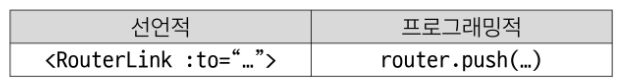

**router.push 인자 활용 참고**

https://router.vuejs.org/guide/essentials/navigation.html

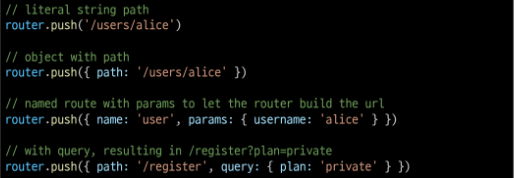

**router.replace()**

현재 위치 바꾸기

history stack에 새로운 항목을 push하지 않고 다른 URL로 이동.

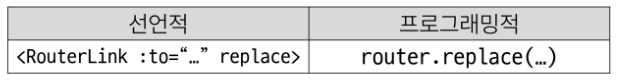

In [ ]:
<!-- UserView.vue  -->

<template>
    <div>
        <h1>UserView</h1>
        <!-- <p> {{ $route }} </p> -->
        <h2> {{ $route.params.id }} 의 페이지 입니다. </h2>
        <!-- route 객체는 전역으로 제공되기 때문에 $로 이용 가능 -->
        <h2> {{ userId }} 번의 페이지 입니다. </h2>

        <button @click="goHome">홈으로!</button>

    </div>
</template>

<script setup>
import { ref } from "vue"
// 최대한 template는 깔끔하게 작성하는 것이 좋음- JavaScipt 에서 동적 변수로 지정하고 넘겨주는 게 좋다
import {useRoute, useRouter} from "vue-router"


const route = useRoute()
const userId = ref(route.params.id)

// 프로그래밍 방식 네비게이션

const router = useRouter()

const goHome = function () {
    router.push({name:"home"})
    // push는 뒤로 가기 가능. replace는 뒤로가기 불가능(history에 남기지 않고 바꿔버리기 때문)
    router.replace({name:"home"})
}

</script>

<style scoped>

</style>

## Navigation Guard

**Navigation Guard**

vue router를 통해 특정 URL에 접근할 때 다른 URL로 redirect를 하거나 취소하여 네비게이션을 보호

인증 정보가 없으면 특정 페이지에 접근하지 못하게 하는 등(로그인 한 사용자만 볼 수 있는 페이지 등)

**Navigation Guard 종류**

1. Globaly(전역 가드)

    - 애플리케이션 전역에서 동작. index.js에서 정의

2. Per-route(라우터 가드)

    - 특정 route에서만 동작. index.js의 각 routes에 정의

3. In-component(컴포넌트 가드)

    - 특정 컴포넌트 내에서만 동작. 컴포넌트 Script에 정의


### Globaly Guard
- router.beforeEach()

**router.beforeEach()**

다른 URL로 이동하기 직전에 실행되는 함수

router.beforeEach 구조

```
router.beforeEach((to, from) => {
    ~~~
    return false
})

```
- to : 이동할 URL 정보가 담긴 Route 객체
- from : 현재 URL 정보가 담긴 Route 객체
- 선택적 반환(return) 값 - 1. false 2. Route Location
false- 현재 네비게이션을 취소. 브라우저 URL이 변경된 경우(사용자가 수동으로 또는 뒤로 버튼을 통해) from 경로의 URL로 재설정
Route Location- router.push()를 호출하는 것처럼 경로 위치를 전달해 다른 위치로 redirect
            반드시 to로 보낼 필요는 없음. 근데 to로 보낼거다-그럼 return 안쓰면 to로 감. 

return false해서 취소시키거나 return 다른 url해서 다른데로 보내거나 return 작성 안하고 to로 자연스럽게 보내거나.

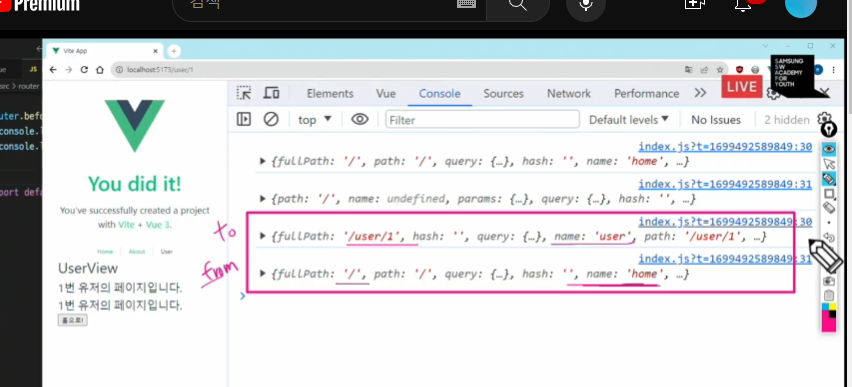

매번 이동할때마다 확인한다? --> 로그인 session 유지를 위해 cookie를 매번 보내는 상황에서 사용. 비인증 사용자면 리다이렉트 시키거나 등등


In [ ]:
// index.js
// globaly router beforeEach 작성

import { createRouter, createWebHistory } from 'vue-router'
import HomeView from '../views/HomeView.vue'
import UserView from "@/views/UserView.vue"

const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'home',
      component: HomeView
    },
    {
      path: '/about',
      name: 'about',
      // route level code-splitting
      // this generates a separate chunk (About.[hash].js) for this route
      // which is lazy-loaded when the route is visited.
      component: () => import('../views/AboutView.vue')
    },
    {
      // 동적변수--> :변수명
      path:"/user/:id",
      name:"user",
      component : UserView
    }
  ]
})
// beforeEach: 다른 url로 이동하기 직전에 호출됨.
router.beforeEach((to, from)=> {
  console.log(to)
  console.log(from)
})

export default router


In [ ]:
// globaly router beforeEach로 로그인 체크
// index.js

import { createRouter, createWebHistory } from 'vue-router'
import HomeView from '../views/HomeView.vue'
import UserView from "@/views/UserView.vue"
import LoginView from "@/views/LoginView.vue"

const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'home',
      component: HomeView
    },
    {
      path: '/about',
      name: 'about',
      // route level code-splitting
      // this generates a separate chunk (About.[hash].js) for this route
      // which is lazy-loaded when the route is visited.
      component: () => import('../views/AboutView.vue')
    },
    {
      // 동적변수--> :변수명
      path:"/user/:id",
      name:"user",
      component : UserView
    },
    {
      path:"/login",
      name:"login",
      component: LoginView
    }
  ]
})
// beforeEach: 다른 url로 이동하기 직전에 호출됨.
router.beforeEach((to, from)=> {
  const isAuthenticated = false 

  // 사용자가 자격이 있으면서 login page로 이동하는 것이 아니라면.
  if (!isAuthenticated && to.name!=="login"){
    console.log("로그인이 필요합니다")
    return {name:"login"}
  }
})

export default router


### Per-route Guard


**router.beforeEnter()**

route에 진입했을 때만 실행되는 함수.

매개변수, 쿼리 값이 변경될 때는 실행되지 x. 다른 경로에서 탐색할 때만 실행됨

**구조**

```
routes객체에서 정의

beforeEnter: (to, from) => {
    ~~~
    return false
}
```

함수의 to, from, 선택 반환 인자는 beforeEach와 동일함

to - 이동할 URL인 route에 대한 정보
from - 현재 URL인 route에 대한 정보가 들어있음.
다른 경로에서 해당 route를 탐색 했을 때 실행된 것




In [ ]:
import { createRouter, createWebHistory } from 'vue-router'
import HomeView from '../views/HomeView.vue'
import UserView from "@/views/UserView.vue"
import LoginView from "@/views/LoginView.vue"

const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'home',
      component: HomeView
    },
    {
      path: '/about',
      name: 'about',
      // route level code-splitting
      // this generates a separate chunk (About.[hash].js) for this route
      // which is lazy-loaded when the route is visited.
      component: () => import('../views/AboutView.vue')
    },
    {
      // 동적변수--> :변수명
      path:"/user/:id",
      name:"user",
      component : UserView,
      beforeEnter : (to, from) => {
        // 다른 route에서  user 페이지에 접근할 때 출력됨.
        console.log(to)
        console.log(from)
      }
    },
    {
      path:"/login",
      name:"login",
      component: LoginView
    }
  ]
})
// beforeEach: 다른 url로 이동하기 직전에 호출됨.
// router.beforeEach((to, from)=> {
//   const isAuthenticated = false 

  // 사용자가 자격이 있으면서 login page로 이동하는 것이 아니라면.
//   if (!isAuthenticated && to.name!=="login"){
//     console.log("로그인이 필요합니다")
//     return {name:"login"}
//   }
// })

export default router


### In-component Guard

**컴포넌트 가드 종류** - onBeforeRouteLeave, onBeforeRouteLeave

- onBeforeRouteLeave

    현재 라우트에서 다른 라우트로 이동하기 전에 실행

    - 사용자가 현재 페이지를 떠나는 동작에 대한 로직을 처리

- onBeforeRouteLeave

    이미 렌더링된 컴포넌트가 같은 라우트 내에서 업데이트 되기 전에 실행

    - 라우트 업데이트 시 추가적인 로직 처리



In [ ]:
<!-- onBeforeRouteLeave -->
<!-- 사용자가 페이지를 떠날 경우 팝업창 출력 -->

<template>
    <div>
        <h1>UserView</h1>
        <!-- <p> {{ $route }} </p> -->
        <h2> {{ $route.params.id }} 의 페이지 입니다. </h2>
        <!-- route 객체는 전역으로 제공되기 때문에 $로 이용 가능 -->
        <h2> {{ userId }} 번의 페이지 입니다. </h2>

        <button @click="goHome">홈으로!</button>

    </div>
</template>

<script setup>
import { ref } from "vue"
// 최대한 template는 깔끔하게 작성하는 것이 좋음- JavaScipt 에서 동적 변수로 지정하고 넘겨주는 게 좋다
import {useRoute, useRouter, onBeforeRouteLeave} from "vue-router"


const route = useRoute()
const userId = ref(route.params.id)

// 프로그래밍 방식 네비게이션

const router = useRouter()

const goHome = function () {
    router.push({name:"home"})
    // push는 뒤로 가기 가능. replace는 뒤로가기 불가능(history에 남기지 않고 바꿔버리기 때문)
    router.replace({name:"home"})
}

// in component Guard
// 1. 
const answer = onBeforeRouteLeave((to, from) => {
    window.confirm("정말 떠나실 건가요")
    //취소 누르면 취소시켜야 함
    if (answer === false) {
        return false
    }
    // 확인을 누르면 이동,
})

</script>

<style scoped>

</style>


반응형 변수는 변경되지 않았음..

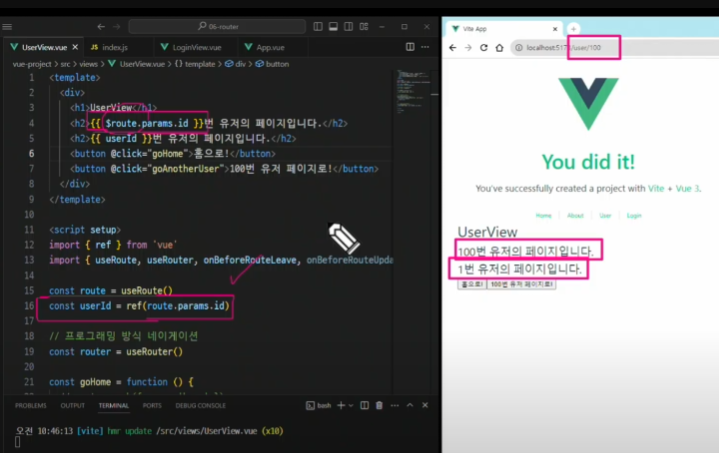

이 경우 onBeforeRouteUpdate에서 JS의 동적 변수 값을 변경하지 않으면 템플릿에서 갱신되지 않음.
--> 컴포넌트가 재사용되었기 때문



In [ ]:
<!-- UserView.vue -->

<template>
    <div>
        <h1>UserView</h1>
        <!-- <p> {{ $route }} </p> -->
        <h2> {{ $route.params.id }} 의 페이지 입니다. </h2>
        <!-- route 객체는 전역으로 제공되기 때문에 $로 이용 가능 -->
        <h2> {{ userId }} 번의 페이지 입니다. </h2>

        <button @click="goHome">홈으로!</button>

        <button @click="goAnotherUser">100번유저 페이지로</button>

    </div>
</template>

<script setup>
import { camelize, ref } from "vue"
// 최대한 template는 깔끔하게 작성하는 것이 좋음- JavaScipt 에서 동적 변수로 지정하고 넘겨주는 게 좋다
import {useRoute, useRouter, onBeforeRouteLeave, onBeforeRouteUpdate} from "vue-router"


const route = useRoute()
const userId = ref(route.params.id)

// 프로그래밍 방식 네비게이션

const router = useRouter()

const goHome = function () {
    router.push({name:"home"})
    // push는 뒤로 가기 가능. replace는 뒤로가기 불가능(history에 남기지 않고 바꿔버리기 때문)
    router.replace({name:"home"})
}

// in component Guard
// 1. onBeforeRouteLeave
const answer = onBeforeRouteLeave((to, from) => {
    window.confirm("정말 떠나실 건가요")
    //취소 누르면 취소시켜야 함
    if (answer === false) {
        return false
    }
    // 확인을 누르면 이동,
})

// 2. onBeforeRouteUpdate
// user 페이지에서 다른 user 페이지로 이동할 때 같은 userpage임. 사실상 이동은 아닐 떄
const goAnotherUser = function() {
    router.push({name:"user", params: {id:100}})
}

// 컴포넌트가 바뀌는 게 아니라 안의 요소만 바뀐거기 때문에 JS에서 쓰고 있던 반응형 변수들은 바뀌지 않았음
// 처음에 한 번 호출되고 컴포넌트가 재사용되면서 동기화가 되지 않음.
// 그걸 update해주는 게 onBeforeRouteUpdateQuard
onBeforeRouteUpdate((to, from) => {
    userId.value = to.params.id
})

</script>

<style scoped>

</style>

### 참고

**Lazy Lodading Routes**

첫 빌드 시 해당 컴포넌트를 로드하지 않고 해당 경로를 처음으로 방문할 때만 컴포넌트를 로드함.

    앱을 빌드할 때 앱의 크기에 따라 페이지 로드 시간이 길어질 수 있기 때문에.

    기존의 정적 가져오기 방식을 동적 가져오기 방식으로 변경하는 것과 같음


## 1109 live code

In [ ]:
<!-- App.vue -->

<script setup>
    import { RouterLink, RouterView } from 'vue-router'
    import HelloWorld from './components/HelloWorld.vue'
    import { ref } from "vue"
    
    const userId = ref(1)
    </script>
    
    <template>
      <header>
        <img alt="Vue logo" class="logo" src="@/assets/logo.svg" width="125" height="125" />
    
        <div class="wrapper">
          <HelloWorld msg="You did it!" />
    
          <nav>
            <!-- JS 문법으로 사용하려면 v-vind 사용하기 ':' -->
            <RouterLink :to="{name:'home'}">Home</RouterLink>
            <RouterLink :to="{name:'about'}">About</RouterLink>
            <!-- params 는 객체로 받음. 받는 값이 여러 개 일 수 있기 때문에 -->
            <!-- routing의 목적은 url의 변경. 페이지를 이동한 것 처럼 보이게 하는 -->
            <RouterLink :to="{name:'user', params: {id:userId}}">User</RouterLink>
            
            <RouterLink :to="{name:'login'}">Login</RouterLink>
          </nav>
        </div>
      </header>
    
      <RouterView />
    </template>
    
    <style scoped>
    header {
      line-height: 1.5;
      max-height: 100vh;
    }
    
    .logo {
      display: block;
      margin: 0 auto 2rem;
    }
    
    nav {
      width: 100%;
      font-size: 12px;
      text-align: center;
      margin-top: 2rem;
    }
    
    nav a.router-link-exact-active {
      color: var(--color-text);
    }
    
    nav a.router-link-exact-active:hover {
      background-color: transparent;
    }
    
    nav a {
      display: inline-block;
      padding: 0 1rem;
      border-left: 1px solid var(--color-border);
    }
    
    nav a:first-of-type {
      border: 0;
    }
    
    @media (min-width: 1024px) {
      header {
        display: flex;
        place-items: center;
        padding-right: calc(var(--section-gap) / 2);
      }
    
      .logo {
        margin: 0 2rem 0 0;
      }
    
      header .wrapper {
        display: flex;
        place-items: flex-start;
        flex-wrap: wrap;
      }
    
      nav {
        text-align: left;
        margin-left: -1rem;
        font-size: 1rem;
    
        padding: 1rem 0;
        margin-top: 1rem;
      }
    }
    </style>
    

In [ ]:
<!-- view/UserView.vue -->

<script setup>
    import { RouterLink, RouterView } from 'vue-router'
    import HelloWorld from './components/HelloWorld.vue'
    import { ref } from "vue"
    
    const userId = ref(1)
    </script>
    
    <template>
      <header>
        <img alt="Vue logo" class="logo" src="@/assets/logo.svg" width="125" height="125" />
    
        <div class="wrapper">
          <HelloWorld msg="You did it!" />
    
          <nav>
            <!-- JS 문법으로 사용하려면 v-vind 사용하기 ':' -->
            <RouterLink :to="{name:'home'}">Home</RouterLink>
            <RouterLink :to="{name:'about'}">About</RouterLink>
            <!-- params 는 객체로 받음. 받는 값이 여러 개 일 수 있기 때문에 -->
            <!-- routing의 목적은 url의 변경. 페이지를 이동한 것 처럼 보이게 하는 -->
            <RouterLink :to="{name:'user', params: {id:userId}}">User</RouterLink>
            
            <RouterLink :to="{name:'login'}">Login</RouterLink>
          </nav>
        </div>
      </header>
    
      <RouterView />
    </template>
    
    <style scoped>
    header {
      line-height: 1.5;
      max-height: 100vh;
    }
    
    .logo {
      display: block;
      margin: 0 auto 2rem;
    }
    
    nav {
      width: 100%;
      font-size: 12px;
      text-align: center;
      margin-top: 2rem;
    }
    
    nav a.router-link-exact-active {
      color: var(--color-text);
    }
    
    nav a.router-link-exact-active:hover {
      background-color: transparent;
    }
    
    nav a {
      display: inline-block;
      padding: 0 1rem;
      border-left: 1px solid var(--color-border);
    }
    
    nav a:first-of-type {
      border: 0;
    }
    
    @media (min-width: 1024px) {
      header {
        display: flex;
        place-items: center;
        padding-right: calc(var(--section-gap) / 2);
      }
    
      .logo {
        margin: 0 2rem 0 0;
      }
    
      header .wrapper {
        display: flex;
        place-items: flex-start;
        flex-wrap: wrap;
      }
    
      nav {
        text-align: left;
        margin-left: -1rem;
        font-size: 1rem;
    
        padding: 1rem 0;
        margin-top: 1rem;
      }
    }
    </style>
    

In [ ]:
// router/index.js

import { createRouter, createWebHistory } from 'vue-router'
import HomeView from '../views/HomeView.vue'
import UserView from "@/views/UserView.vue"
import LoginView from "@/views/LoginView.vue"

const isAuthenticated = true

const router = createRouter({
  history: createWebHistory(import.meta.env.BASE_URL),
  routes: [
    {
      path: '/',
      name: 'home',
      component: HomeView
    },
    {
      path: '/about',
      name: 'about',
      // route level code-splitting
      // this generates a separate chunk (About.[hash].js) for this route
      // which is lazy-loaded when the route is visited.
      component: () => import('../views/AboutView.vue')
    },
    {
      // 동적변수--> :변수명
      path:"/user/:id",
      name:"user",
      component : UserView,
      beforeEnter : (to, from) => {
        // 다른 route에서 user 페이지에 접근할 때 출력됨.
        // user/ 뒤 id값을 직접 입력해서 페이지를 옮기면 또 실행됨.
        console.log(to)
        console.log(from)
      }
    },
    {
      path:"/login",
      name:"login",
      component: LoginView,
      beforeEnter: (to, from) => {
        if (isAuthenticated===true){
            console.log("already logined")
            return {name:"home"}
        }
      }
    }
  ]
})
// beforeEach: 다른 url로 이동하기 직전에 호출됨.
// router.beforeEach((to, from)=> {
//   const isAuthenticated = false 

  // 사용자가 자격이 있으면서 login page로 이동하는 것이 아니라면.
//   if (!isAuthenticated && to.name!=="login"){
//     console.log("로그인이 필요합니다")
//     return {name:"login"}
//   }
// })

export default router
